In [17]:
import matplotlib.pyplot as plt
import scipy.optimize as optimizer
import numpy as np

In [3]:
x_data = []
y_data = []

In [4]:
def fill_x_array_with_data_from_file(name_of_file):
    del x_data[:]
    x_data_file = open(name_of_file, 'r')  
    for row in x_data_file:
        x_data.append(float(row))
              
            
def fill_y_array_with_data_from_file(name_of_file):
    del y_data[:]
    y_data_file = open(name_of_file, 'r')
    for row in y_data_file:
        y_data.append(float(row))  

In [5]:
def function(x, a, b):
    y = []
    for x_i in x:
        y_i = a * x_i + b
        y.append(y_i)
    return y

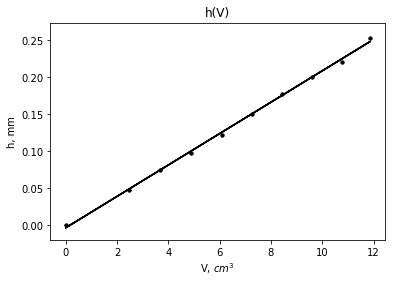

Параметр a: 0.0213 ± 0.0002
Параметр b: -0.0037 ± 0.0014


In [32]:
plt.clf()

fill_x_array_with_data_from_file('data_x')
fill_y_array_with_data_from_file('data_y')
plt.scatter(x_data, y_data, color='k', marker='.')
optimizedParametres, pcov = optimizer.curve_fit(function, x_data, y_data)
plt.plot(x_data, function(x_data, *optimizedParametres), color = 'k')
perr = np.sqrt(np.diag(pcov)) #mistakes of opt_parametres

plt.xlabel('V, $cm^3$')
plt.ylabel('h, mm')
plt.title('h(V)')
plt.savefig('plot', dpi = 300)

plt.show()
print 'Параметр a:', '{:06.4f}'.format(optimizedParametres[0]), u"\u00B1", '{:06.4f}'.format(perr[0])
print 'Параметр b:', '{:06.4f}'.format(optimizedParametres[1]), u"\u00B1", '{:06.4f}'.format(perr[1])